## CEAP Reimbursements descriptive analysis

This notebook presents a descriptive analysis of **CEAP** expenses addressing the following questions:

1. Monthly average per congressperson (grouped per state, as values varies across states)
2. Monthly ratio of the total allowed and the total spent per congressperson (grouped per state, as values varies across states)
3. Monthly average per subquota (grouped per state, as values varies across states)

Questions are not explicitly answered. Charts and tables are provided for free interpretation, some of them with brief commentaries from the author.
Obs.: original analysis was made considering data from 2009 to 2017. One might want to filter by terms (e.g. 2010-2014) to make more realistic comparisons (spenditures by state, congressperson, subquota).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
reimbursements = pd.read_csv('../data/2017-07-04-reimbursements.xz',
                   parse_dates=[16],
                   low_memory=False,
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str,})
reimbursements.shape

(1619213, 31)

In [3]:
reimbursements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619213 entries, 0 to 1619212
Data columns (total 31 columns):
year                          1619213 non-null int64
applicant_id                  1619213 non-null int64
document_id                   1619213 non-null object
reimbursement_value_total     1619213 non-null float64
total_net_value               1619213 non-null float64
reimbursement_numbers         1619213 non-null object
congressperson_name           1619213 non-null object
congressperson_id             1616157 non-null object
congressperson_document       1616157 non-null object
term                          1619213 non-null float64
state                         1616157 non-null object
party                         1616157 non-null object
term_id                       1616157 non-null object
subquota_number               1619213 non-null int64
subquota_description          1619213 non-null object
subquota_group_id             1619213 non-null int64
subquota_group_descripti

*congressperson_name* has 1619213 entries, but *congressperson_document* has fewer entries: 1616157. This is because some reimbursements was made to the parties. As you can see below.

In [4]:
reimbursements[reimbursements["congressperson_document"].isnull()]["congressperson_name"].unique()

array(['LIDERANÇA DO PT', 'LIDERANÇA DO PSDB', 'PDT', 'SDD', 'PROS',
       'LID.GOV-CD', 'PHS', 'PTN', 'PSOL'], dtype=object)

In [5]:
reimbursements["year_month"] = reimbursements["year"].astype(str) + "/" + reimbursements["month"].astype(str)

In [6]:
reimbursements.sort_values(by=["year_month","state"], ascending=[False,True], inplace=True)

In [7]:
states = reimbursements[reimbursements["state"].notna()]["state"].unique()

In [8]:
year_months = reimbursements[reimbursements["year_month"].notna()]["year_month"].unique()

## Filters depending on the scope of analysis
Here, filters by state, party, years, etc. can be applied.

Obs.: chart commentaries provided might not remain valid depending on filters chosen. 

In [9]:
# Filters only most recent years (from 2015)
# reimbursements = reimbursements[(reimbursements['year'] == 2015) | (reimbursements['year'] == 2016) | (reimbursements['year'] == 2017)]

## 1. Monthly average per congressperson
Monthly average per congressperson (grouped per state, as values varies across states)

In [10]:
states

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [11]:
monthly_avg_by_month = reimbursements.groupby(['state', 'congressperson_name', 'year_month']).agg({'total_net_value': 'mean'})

In [12]:
monthly_avg = monthly_avg_by_month.groupby(['state', 'congressperson_name']).agg({'total_net_value': 'mean'})

### Same scale

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


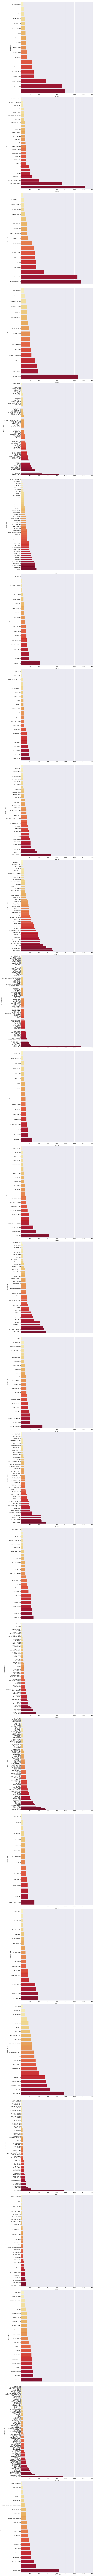

In [13]:
ax = pd.DataFrame(monthly_avg.to_records())
ax.sort_values(['state','total_net_value'], inplace=True)
g = sns.FacetGrid(row="state", data=ax, palette="YlOrRd", sharey=False, size=15, aspect=1)
g.map(sns.barplot, 'total_net_value', 'congressperson_name', palette="YlOrRd")
g.set_axis_labels('Monthly Avg (R$)', 'Congress Person')
plt.show()

### Scale per state

In [14]:
'''current_palette = sns.color_palette("YlOrRd")
for state in states:
    selection = monthly_avg.xs(state).sort_values(['total_net_value'])
    if len(selection) > 35:
        plt.figure(figsize=(10,25))
    ax = sns.barplot(y=selection.index, x="total_net_value", data=selection, palette="YlOrRd")
    ax.set_title(state)
    ax.set(ylabel='Congress Person', xlabel='Monthly Avg (R$)')
    plt.show()
'''

'current_palette = sns.color_palette("YlOrRd")\nfor state in states:\n    selection = monthly_avg.xs(state).sort_values([\'total_net_value\'])\n    if len(selection) > 35:\n        plt.figure(figsize=(10,25))\n    ax = sns.barplot(y=selection.index, x="total_net_value", data=selection, palette="YlOrRd")\n    ax.set_title(state)\n    ax.set(ylabel=\'Congress Person\', xlabel=\'Monthly Avg (R$)\')\n    plt.show()\n'

In [15]:
'''
for year_month in year_months:
    for state in states:
        selection = reimbursements[(reimbursements["year_month"]==year_month) & (reimbursements["state"]==state)].groupby(['congressperson_name'])['total_net_value'].mean()
        if len(selection) == 0 :
            continue
        if len(selection) > 25:
            selection.plot(kind='barh', title=year_month+" "+state, figsize=(10,30))
        else:
            selection.plot(kind='barh', title=year_month+" "+state)
        plt.ylabel('Congress Person')
        plt.show()
'''

'\nfor year_month in year_months:\n    for state in states:\n        selection = reimbursements[(reimbursements["year_month"]==year_month) & (reimbursements["state"]==state)].groupby([\'congressperson_name\'])[\'total_net_value\'].mean()\n        if len(selection) == 0 :\n            continue\n        if len(selection) > 25:\n            selection.plot(kind=\'barh\', title=year_month+" "+state, figsize=(10,30))\n        else:\n            selection.plot(kind=\'barh\', title=year_month+" "+state)\n        plt.ylabel(\'Congress Person\')\n        plt.show()\n'

---
## 2. Monthly ratio of the total allowed and the total spent
Monthly ratio of the total allowed and the total spent per congressperson (grouped per state, as values varies across states)

### Computing estimated CEAP values for years in between 2009 and 2017 using CAGR
thanks to luipillmann for the notebook **2017-05-01-luipillmann-intro-to-reimbursements.ipynb**!

In [16]:
# Source 2017-05-01-luipillmann-intro-to-reimbursements.ipynb. Thanks!

# Source: http://www2.camara.leg.br/a-camara/estruturaadm/diretorias/dirgeral/estrutura-1/deapa/portal-da-posse/ceap-1
ceap_2009 = [40711.32, 37318.73, 39734.17, 39554.50, 35540.51, 38705.50, 27977.66, 34080.83, 32317.69, 38429.49, 32856.38, 36949.65, 35924.24, 38499.17, 38319.91, 37992.68, 37344.18, 35412.67, 32550.32, 38963.25, 39828.33, 41612.80, 37256.00, 36337.92, 36578.43, 33730.95, 35993.76]

# Source: http://www2.camara.leg.br/comunicacao/assessoria-de-imprensa/cota-parlamentar
ceap_2017 = [44632.46, 40944.10, 43570.12, 43374.78, 39010.85, 42451.77, 30788.66, 37423.91, 35507.06, 42151.69, 36092.71, 40542.84, 39428.03, 42227.45, 42032.56, 41676.80, 40971.77, 38871.86, 35759.97, 42731.99, 43672.49, 45612.53, 40875.90, 39877.78, 40139.26, 37043.53, 39503.61]

ceap_limit_states = pd.DataFrame({
    '2009': ceap_2009,
    '2017': ceap_2017
}, index=states)

# Computes estimated CEAP values for years in between 2009 and 2017 using CAGR
ceap_values = pd.DataFrame(columns=['year', 'state', 'quota'])

ini_year = 2009
for i in range(2018-ini_year):
    year = ini_year + i
    state_index = 0
    for state in states:
        quota = -1
        if year == 2009:
            quota = ceap_limit_states['2009'][state_index]
        elif year == 2017:
            quota = ceap_limit_states['2017'][state_index]
        else:
            # Calculates CAGR according to data available (CEAP@2009 and CEAP@2017), using the CEAP per state
            cagr = ((ceap_limit_states['2017'][state_index] / ceap_limit_states['2009'][state_index])**(1./(2017-2009)) - 1)
            quota = ceap_values[(ceap_values['state'] == state) & (ceap_values['year'] == year-1)]['quota'].values[0] * (1 + cagr)
        ceap_values = ceap_values.append(pd.DataFrame([[year, state, quota]], columns=['year', 'state', 'quota']))
        state_index += 1
        
ceap_values.head(2)

year state     quota
0  2009    AC  40711.32
0  2009    AL  37318.73

In [17]:
monthly_sum = reimbursements.groupby(['state', 'congressperson_name', 'year_month']).agg({'total_net_value': 'sum'})

In [18]:
def calc_ratio(state, name, year_month, total_net_value):
    year = int(year_month.split('/')[0])
    ratio = (total_net_value / ceap_values[(ceap_values['state'] == state) & (ceap_values['year'] == year)]['quota'].values[0])
    #print(state+' '+year_month+' '+str(ratio))
    return ratio

In [19]:
monthly_sum_with_ratio = pd.DataFrame(monthly_sum.to_records())
monthly_sum_with_ratio['ratio'] = monthly_sum_with_ratio.apply(lambda x: calc_ratio(*x), axis=1)

In [20]:
monthly_avg = monthly_sum_with_ratio.groupby(['state', 'congressperson_name']).agg({'ratio': 'mean'})

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


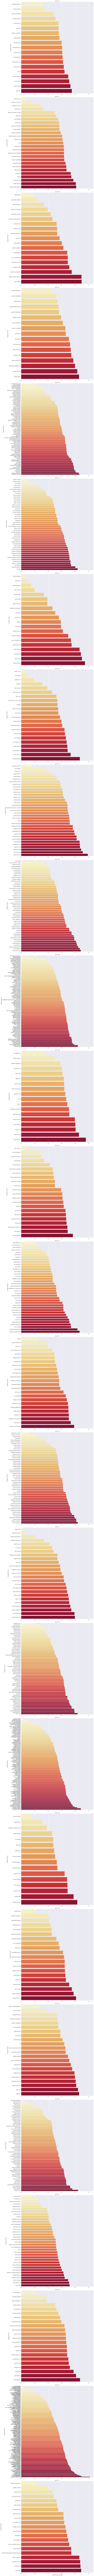

In [21]:
ax = pd.DataFrame(monthly_avg.to_records())
ax.sort_values(['state','ratio'], inplace=True)
g = sns.FacetGrid(row="state", data=ax, palette="YlOrRd", sharey=False, size=15, aspect=1)
g.map(sns.barplot, 'ratio', 'congressperson_name', palette="YlOrRd")
g.set_axis_labels('Monthly Ratio Avg (R$)', 'Congress Person')
plt.show()

---
## 3. Monthly average per subquota
Monthly average per subquota (grouped per state, as values varies across states)

In [22]:
monthly_avg_by_month = reimbursements.groupby(['state', 'subquota_description', 'year_month']).agg({'total_net_value': 'mean'})

In [23]:
monthly_avg = monthly_avg_by_month.groupby(['state', 'subquota_description']).agg({'total_net_value': 'mean'})

### Same scale

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


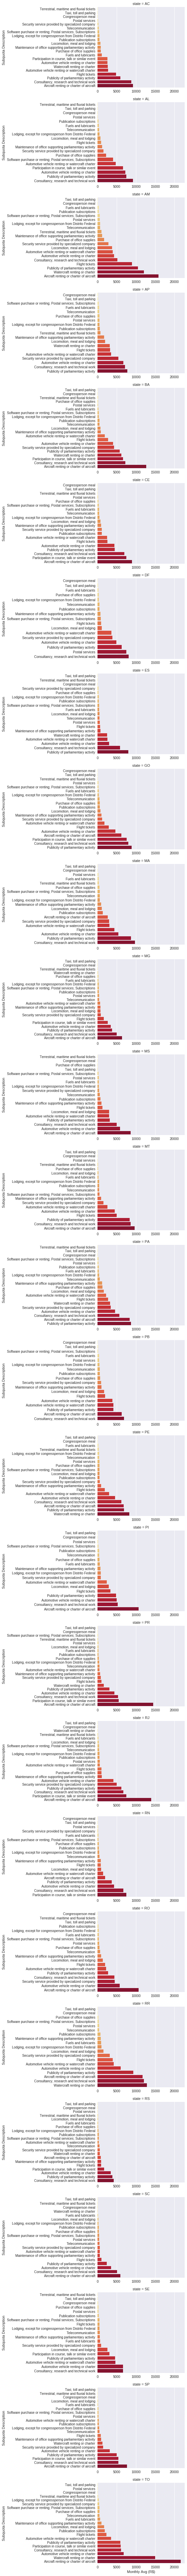

In [24]:
ax = pd.DataFrame(monthly_avg.to_records())
ax.sort_values(['state','total_net_value'], inplace=True)
g = sns.FacetGrid(row="state", data=ax, palette="YlOrRd", sharey=False, size=4, aspect=2)
g.map(sns.barplot, 'total_net_value', 'subquota_description', palette="YlOrRd")
g.set_axis_labels('Monthly Avg (R$)', 'Subquota Description')
plt.show()

### Scale per state

In [25]:
'''current_palette = sns.color_palette("YlOrRd")
for state in states:
    selection = monthly_avg.xs(state).sort_values(['total_net_value'])
    if len(selection) > 35:
        plt.figure(figsize=(10,25))
    ax = sns.barplot(y=selection.index, x="total_net_value", data=selection, palette="YlOrRd")
    ax.set_title(state)
    ax.set(ylabel='Subquota Description', xlabel='Monthly Avg (R$)')
    plt.show()
'''

'current_palette = sns.color_palette("YlOrRd")\nfor state in states:\n    selection = monthly_avg.xs(state).sort_values([\'total_net_value\'])\n    if len(selection) > 35:\n        plt.figure(figsize=(10,25))\n    ax = sns.barplot(y=selection.index, x="total_net_value", data=selection, palette="YlOrRd")\n    ax.set_title(state)\n    ax.set(ylabel=\'Subquota Description\', xlabel=\'Monthly Avg (R$)\')\n    plt.show()\n'

In [26]:
'''
for year_month in year_months:
    for state in states:
        selection = reimbursements[(reimbursements["year_month"]==year_month) & (reimbursements["state"]==state)].groupby(['subquota_description'])['total_net_value'].mean()
        if len(selection) == 0 :
            continue
        if len(selection) > 25:
            selection.plot(kind='barh', title=year_month+" "+state, figsize=(10,30))
        else:
            selection.plot(kind='barh', title=year_month+" "+state)
        plt.ylabel('Subquota Description')
        plt.show()
'''

'\nfor year_month in year_months:\n    for state in states:\n        selection = reimbursements[(reimbursements["year_month"]==year_month) & (reimbursements["state"]==state)].groupby([\'subquota_description\'])[\'total_net_value\'].mean()\n        if len(selection) == 0 :\n            continue\n        if len(selection) > 25:\n            selection.plot(kind=\'barh\', title=year_month+" "+state, figsize=(10,30))\n        else:\n            selection.plot(kind=\'barh\', title=year_month+" "+state)\n        plt.ylabel(\'Subquota Description\')\n        plt.show()\n'